# Introduction to Motion in Image Processing
In the realm of image processing and computer vision, understanding and analyzing motion is crucial for various applications, especially in object tracking and localization. Motion, in this context, refers to the change in position of objects between different frames of a video or different images captured over time.

## Key Concepts in Motion Analysis

1. **Frame-to-Frame Changes:** By examining how objects move or change position from one frame to another, we can infer valuable information about their trajectory and speed.

2. **Background vs. Foreground Motion:** Differentiating between motion in the background (like moving trees) and foreground (like walking people or vehicles) is vital for accurate tracking and localization.

3. **Motion Vectors:** These are vectors that represent the direction and speed of an object's motion in an image. They are crucial for tracking the object's path over time.

## Applications of Motion Analysis
- **Object Tracking:** Identifying and following objects as they move across frames. Used in surveillance, sports analysis, and autonomous vehicles.
- **Localization:** Determining the position of objects in motion relative to their environment. Essential for navigation systems and robotics.
- **Activity Recognition:** Understanding and classifying the activities or behaviors of moving objects or individuals.
  
## Challenges in Motion Analysis
- **Varying Speeds and Directions:** Objects can move at different speeds and in various directions, complicating the tracking process.
- **Occlusions:** Objects might get occluded or hidden behind others, making it difficult to maintain consistent tracking.
- **Lighting and Environmental Changes:** Variations in lighting and environmental conditions can affect the visibility and appearance of objects.
  
## Setting the Stage for Optical Flow
One of the methods to effectively analyze motion in images is through a concept known as **"Optical Flow."** Optical Flow refers to the pattern of apparent motion of objects in a visual scene, caused by the relative motion between an observer and the scene. Understanding the basics of motion in image processing is a precursor to delving into the more advanced topic of Optical Flow, which provides robust techniques for motion detection, tracking, and analysis.

# Optical Flow in Image Processing

**Introduction to Optical Flow**

Optical Flow is a key concept in computer vision, dealing with the apparent motion of objects in a sequence of images. It refers to the pattern of apparent motion of objects, surfaces, and edges in a visual scene, caused by the relative motion between an observer and the scene.

## Where is Optical Flow Used?
Optical Flow is a well-researched and fast algorithm and it is used in a lot of tracking technology, today! One such example is the [NVIDIA Redtail drone](https://blogs.nvidia.com/blog/category/robotics/), which uses optical flow to track surrounding objects in a video stream.


## How Optical Flow Works
Optical Flow works on the assumption that the patterns of brightness or color in the objects (or their parts) in a sequence of images are consistent over time, even though their positions are changing.

**1. Brightness Constancy:** A fundamental assumption in Optical Flow is that the brightness of any point in an image remains constant over time, even as its position changes.

**2. Motion Estimation:** Optical Flow involves estimating the motion vector (direction and speed) of each pixel or block of pixels between successive frames.

## Methods of Computing Optical Flow
There are two primary methods to compute Optical Flow:

**1. Dense Optical Flow:** Calculates the motion vector for every single pixel in the image, which is computationally intensive but provides a detailed motion map. Examples include the Horn-Schunck and Lucas-Kanade methods.

**2. Sparse Optical Flow:** Identifies specific features (like edges or corners) and calculates the motion only for these points. It is less computationally demanding.

## Applications of Optical Flow
- **Motion Detection** and Tracking: Used in surveillance, traffic monitoring, and sports analytics.
- **Video Stabilization:** Helps in removing unwanted camera movements in videos.
- **3D Reconstruction:** Assists in reconstructing the structure of scenes.
- **Gesture Recognition:** Used in human-computer interaction.
  
## Challenges in Implementing Optical Flow
- **Aperture Problem:** Difficulty in determining the motion direction when observing motion through a small aperture.
- **Ambiguity in Uniform Regions:** Lack of texture or features in uniform regions makes it difficult to estimate motion.
- **Sensitivity to Noise:** Optical Flow algorithms can be sensitive to noise and variations in lighting.
  
## Optical Flow in Deep Learning
With the advent of deep learning, newer approaches to Optical Flow have emerged, where convolutional neural networks are trained to predict motion vectors. These methods tend to be more robust against the traditional challenges faced by Optical Flow techniques.

# Motion Vectors
A motion vector for a 2D image has an x and y component (u, v). A motion vector for any point starts with the location of the point as the origin of the vector and its destination as the end of the vector (where the arrow point is).

The magnitude is calculated as 
$$\sqrt{u^2 + v^2}$$

 

The orientation of the vector can be calculated as 
$$tan^1(v/u)$$
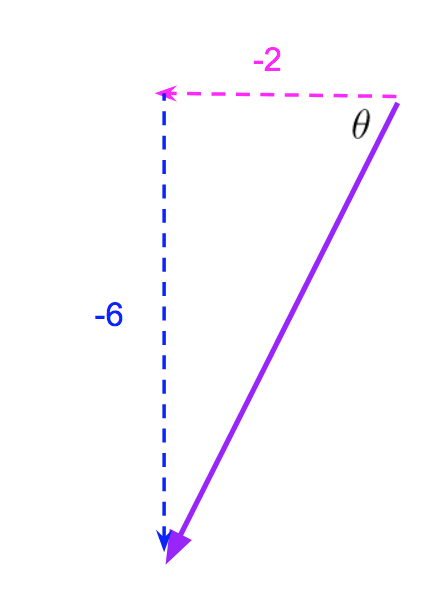


A vector with (u,v) = (-2, -6)



# Brightness Constancy Assumption

Brightness Constancy Assumption equation: A function of x , y , t

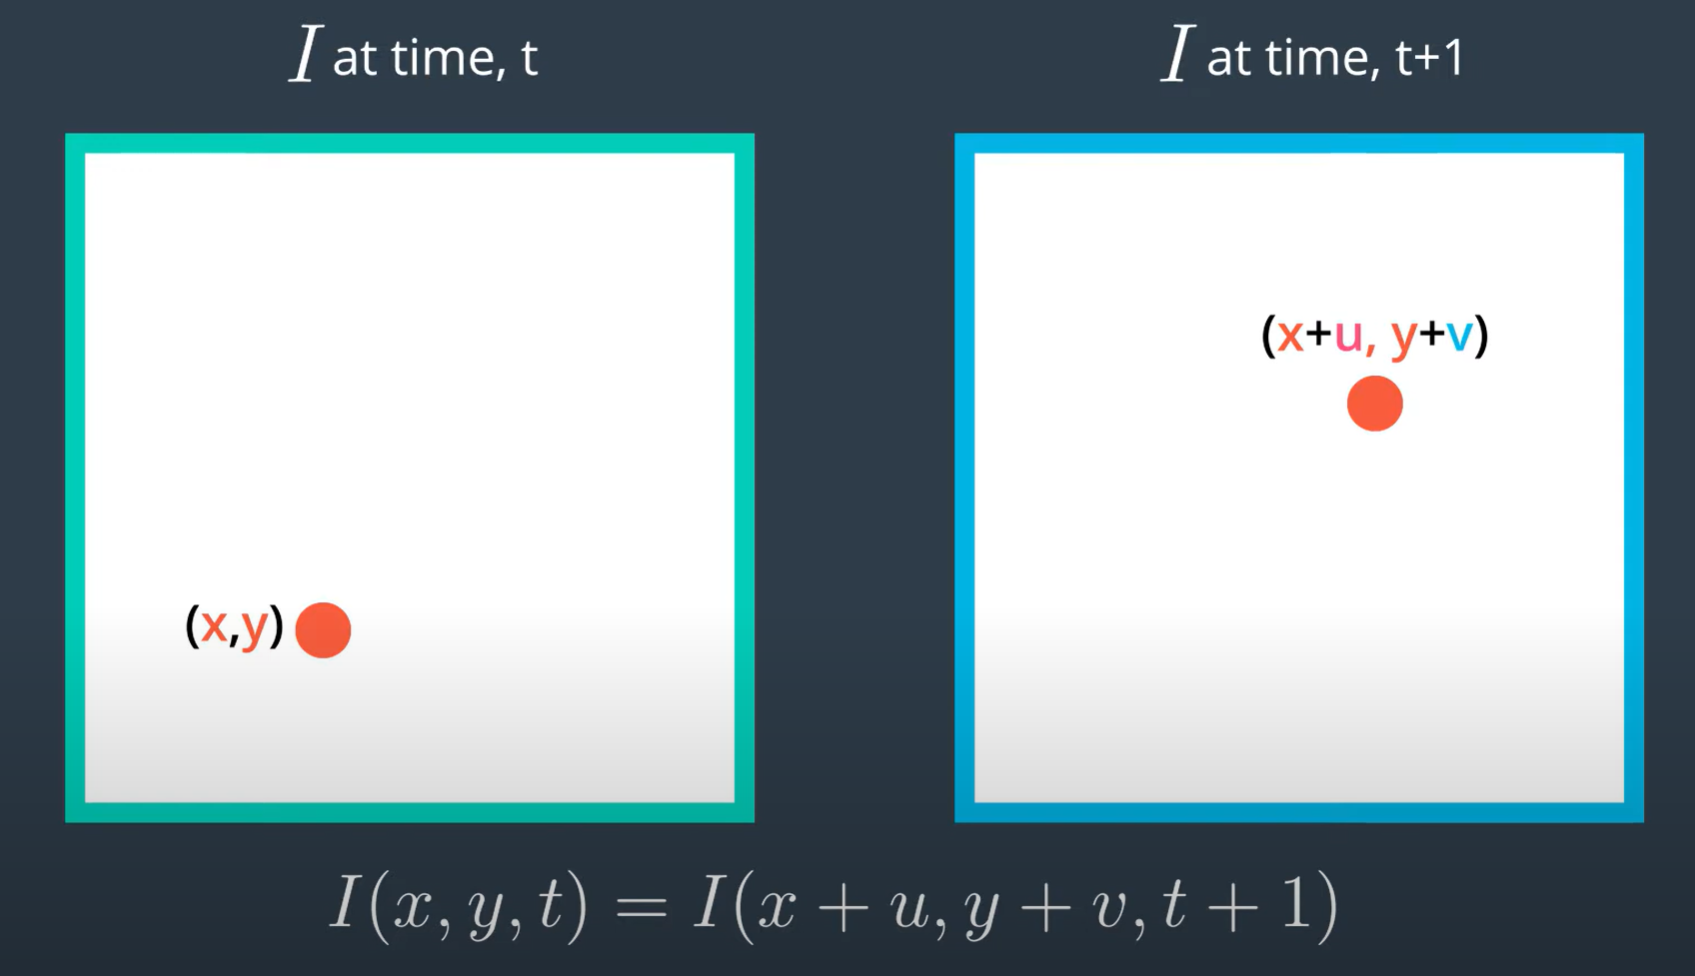


Can be broken down into a Tayler sereis expantion, which represent this intensity function as a summation of terms: 
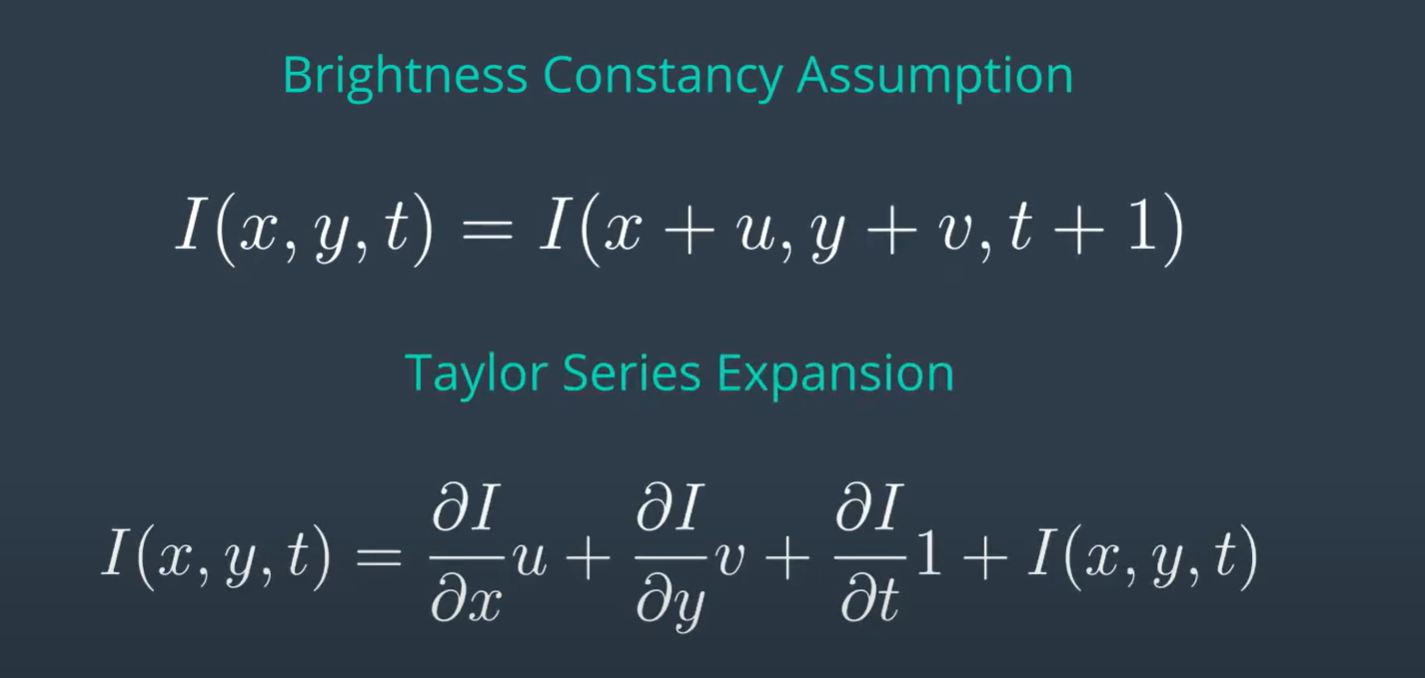

# Optical Flow and Motion Vectors

Optical flow tracks objects by looking at where the *same* points have moved from one image frame to the next. Let's load in a few example frames of a pacman-like face moving to the right and down and see how optical flow finds **motion vectors** that describe the motion of the face!


In [6]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images
import matplotlib.pyplot as plt
import cv2  # computer vision library
%matplotlib inline

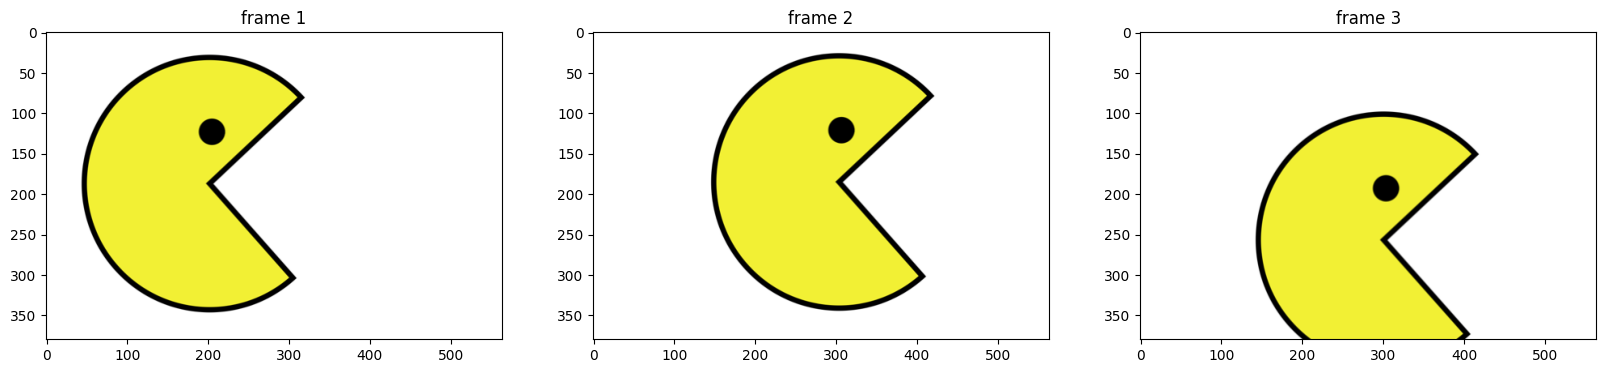

In [7]:

# Read in the image frames
frame_1 = cv2.imread('images/pacman_1.png')
frame_2 = cv2.imread('images/pacman_2.png')
frame_3 = cv2.imread('images/pacman_3.png')

# convert to RGB
frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)
frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB)
frame_3 = cv2.cvtColor(frame_3, cv2.COLOR_BGR2RGB)


# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('frame 1')
ax1.imshow(frame_1)
ax2.set_title('frame 2')
ax2.imshow(frame_2)
ax3.set_title('frame 3')
ax3.imshow(frame_3)


## Finding Points to Track

Befor optical flow can work, we have to give it a set of *keypoints* to track between two image frames!

In the below example, we use a **Shi-Tomasi corner detector**, which uses the same process as a Harris corner detector to find patterns of intensity that make up a "corner" in an image, only it adds an additional parameter that helps select the most prominent corners. You can read more about this detection algorithm in:

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html 

Alternatively, you could choose to use Harris or even ORB to find feature points. I just found that this works well.

**You sould see that the detected points appear at the corners of the face.**

[[[318.  82.]]

 [[308. 304.]]

 [[208. 188.]]

 [[309.  81.]]

 [[299. 304.]]

 [[199. 188.]]]


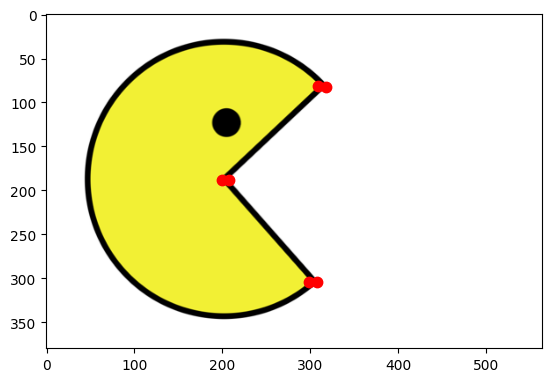

In [8]:
# parameters for ShiTomasi corner detection
feature_params = dict( maxCorners = 10,
                       qualityLevel = 0.2,
                       minDistance = 5,
                       blockSize = 5 )


# convert all frames to grayscale
gray_1 = cv2.cvtColor(frame_1, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.cvtColor(frame_2, cv2.COLOR_RGB2GRAY)
gray_3 = cv2.cvtColor(frame_3, cv2.COLOR_RGB2GRAY)


# Take first frame and find corner points in it
pts_1 = cv2.goodFeaturesToTrack(gray_1, mask = None, **feature_params)

# display the detected points
plt.imshow(frame_1)
for p in pts_1:
    # plot x and y detected points
    plt.plot(p[0][0], p[0][1], 'r.', markersize=15)

# print out the x-y locations of the detected points
print(pts_1)

## Perform Optical Flow

Once we've detected keypoints on our initial image of interest, we can calculate the optical flow between this image frame (frame 1) and the next frame (frame 2), using OpenCV's `calcOpticalFlowPyrLK` which is documented here:

https://docs.opencv.org/3.4/dc/d6b/group__video__track.html#ga473e4b886d0bcc6b65831eb88ed93323

It takes in an initial image frame, the next image, and the first set of points, and it returns the detected points in the next frame and a value that indicates how good matches are between points from one frame to the next.

The parameters also include a window size and maxLevels that indicate the size of a window and mnumber of levels that will be used to scale the given images using pyramid scaling; this version peforms an iterative search for matching points and this matching criteria is reflected in the last parameter (you may need to change these values if you are working with a different image, but these should work for the provided example).

In [9]:
# parameters for lucas kanade optical flow
lk_params = dict( winSize  = (5,5),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


# calculate optical flow between first and second frame
pts_2, match, err = cv2.calcOpticalFlowPyrLK(gray_1, gray_2, pts_1, None, **lk_params)

# Select good matching points between the two image frames
good_new = pts_2[match==1]
good_old = pts_1[match==1]


Next, let's display the resulting motion vectors! You should see the first image with motion vectors drawn on it that indicate the direction of motion from the first frame to the next.

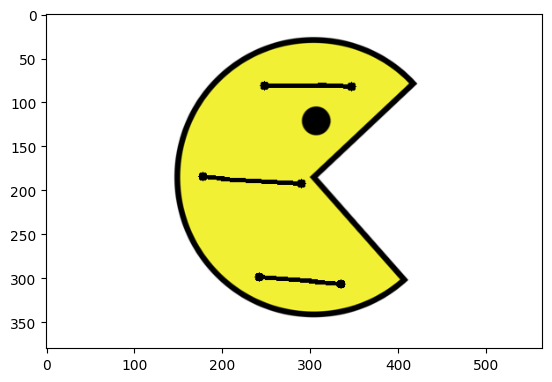

In [11]:
# create a mask image for drawing (u,v) vectors on top of the second frame
mask = np.zeros_like(frame_2)

# draw the lines between the matching points (these lines indicate motion vectors)
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    # draw points on the mask image
   # mask = cv2.circle(mask,(a,b),5,(200),-1)
    mask = cv2.circle(mask, (int(a), int(b)), 5, (200, 200, 200), -1)

    # draw motion vector as lines on the mask image
    #mask = cv2.line(mask, (a,b),(c,d), (200), 3)
    mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (200, 200, 200), 3)

    # add the line image and second frame together

composite_im = np.copy(frame_2)
composite_im[mask!=0] = [0]

plt.imshow(composite_im)